In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Load Data

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

`CustomerID`: 인덱스와 같은 역할을 함으로 삭제

In [5]:
df.drop(["CustomerID"],axis=1,inplace=True)

`Gender` One-hot Encoding : Male->0, Female->1

In [6]:
print(df["Gender"].unique())
df["Gender"]=df["Gender"].replace({'Male':0,'Female':1})
df["Gender"]

['Male' 'Female']


0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [7]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


#EDA

1. 성별이 고르게 분포

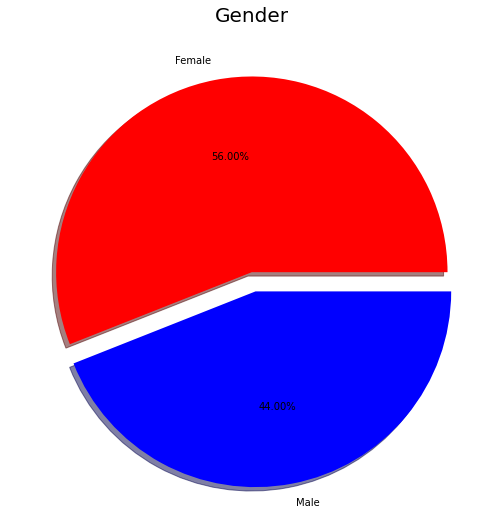

In [8]:
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(df["Gender"].value_counts(), colors = ["red","blue"], explode = [0,0.1], labels = ["Female","Male"], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.show()

2. 성별이 변수간의 관계에서 큰 영향을 미치지 않음

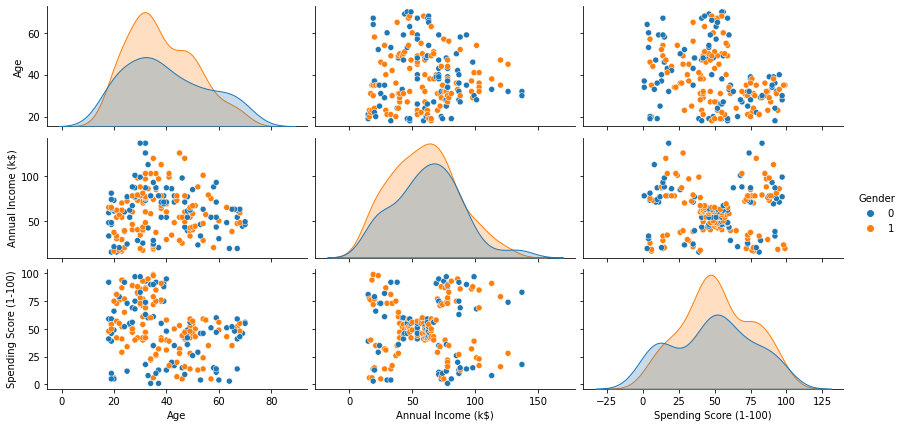

In [9]:
sns.pairplot(df, hue='Gender', height=2, aspect=2)
plt.show()

3.  27세 ~ 30세 : 자주 방문 그러나 뚜렷한 방문이나 소비 패턴을 보이지는 않음<br>



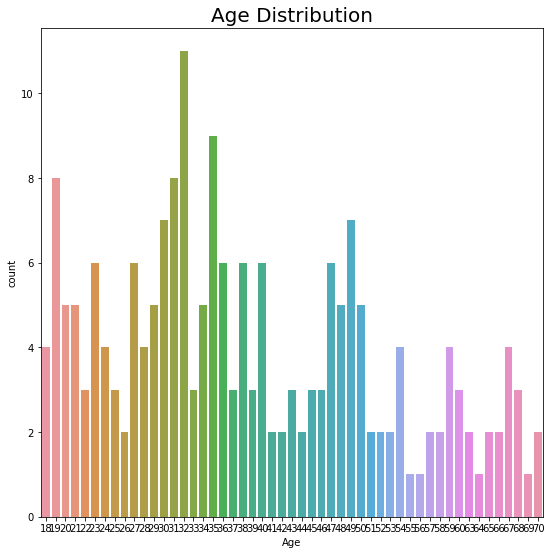

In [10]:
sns.countplot(df['Age'])
plt.title('Age Distribution', fontsize = 20)
plt.show()

4. 변수 간의 뚜렷한 선형관계가 존재하지 않음


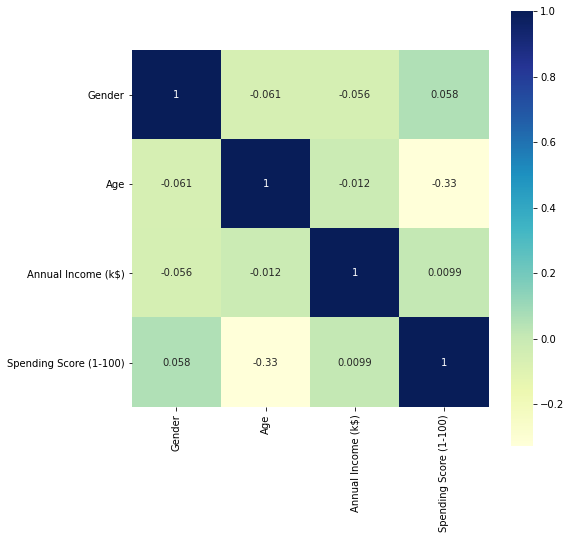

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cbar = True,  square = True, annot=True, cmap= 'YlGnBu')

#Feature Scaling 
*거리를 바탕으로 군집화를 진행하기 때문<br>
*표준화된 df를 따로 만들어 df_scaled로 따로 저장

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(df)
df_scaled_np=std.transform(df)
df_scaled=pd.DataFrame(df_scaled_np,columns=df.columns)

In [13]:
df_scaled.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,-8.437695e-17,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.128152e+00,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-1.128152e+00,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,8.864053e-01,7.284319e-01,6.656748e-01,8.851316e-01
max,8.864053e-01,2.235532e+00,2.917671e+00,1.894492e+00


#K-Means<br>
:분리형/계층적군집화 -> 중심기반군집화<br><br>
`가정`:동일한 군집에 속하는 데이터는 어떠한 중심을 기준으로 분포할 것이다.<br><br>
`알고리즘`
 1. n개의 중심점 설정 
 2. 이 중심점에서 각 점간의 거리의 합이 최소가 되는 중심점의 위치를 찾기 
 3. 이 중심점에서 가까운 점들을 중심점을 기준으로 묶기<br>-> 중심점은 결국 각 군집의 데이터의 평균값을 위치로 가지게 됨<br>
 
`k-means++`<br>
:데이터 분포 정보를 사용해 초기 중심 설정<br>
: 초기 군집 중심을 가능한 멀리 떨어지도록 만듦

**1.**original data<br>



*   Elbow Point: k=6 이전까지 급격하게 하강
*   Silhouette Score: k=6일 때 최대 값 0.45206493204632353 가짐



In [14]:
from sklearn.cluster import KMeans

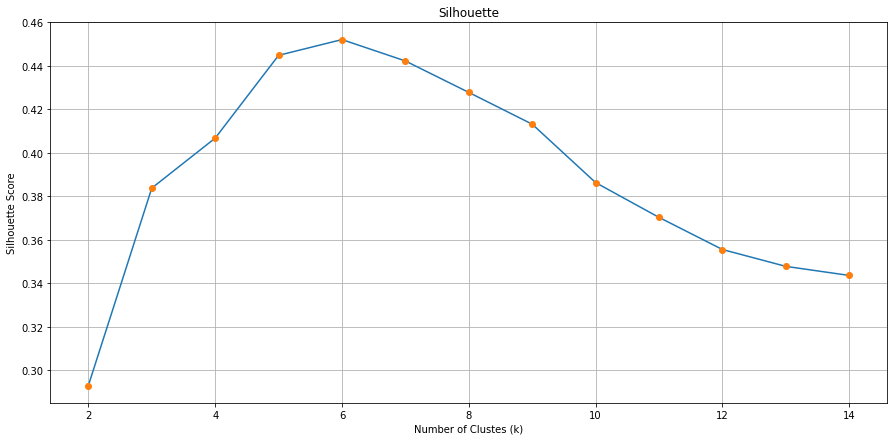

##Max Silhouette Score
0.45206493204632353
k=6


In [15]:
#Silhouette Score
from sklearn.metrics import silhouette_score
x=df
silhouette_score_value=[]
for coef in range(2,15):
  k_means_algorithm=KMeans(n_clusters=coef,init="k-means++",random_state=11)
  k_means_algorithm.fit(x)
  pred=k_means_algorithm.labels_
  silhouette_score_value.append(silhouette_score(x,pred))

plt.figure(1,figsize=(15,7))
plt.plot(range(2,15),silhouette_score_value)
plt.plot(np.arange(2 , 15) , silhouette_score_value , 'o')
plt.grid(True)
plt.title("Silhouette")
plt.xlabel("Number of Clustes (k)")
plt.ylabel("Silhouette Score")
plt.show()

print("##Max Silhouette Score")
print(max(silhouette_score_value))
print("k=6")

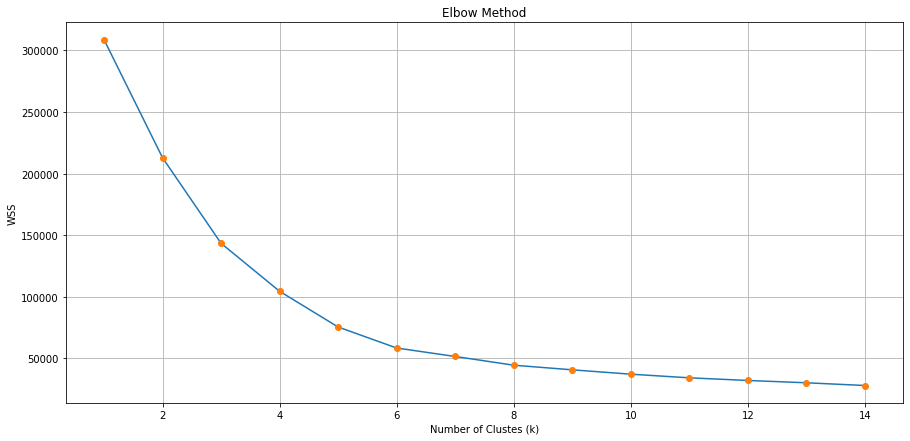

In [16]:
#Elbow point

x=df
s=[]
for k in range(1,15):
  k_means_algorithm=KMeans(n_clusters=k,init="k-means++",random_state=11)
  k_means_algorithm.fit(x)
  s.append(k_means_algorithm.inertia_)

plt.figure(1,figsize=(15,7))
plt.plot(range(1,15),s)
plt.plot(np.arange(1 , 15) , s , 'o')
plt.grid(True)
plt.title("Elbow Method")
plt.xlabel("Number of Clustes (k)")
plt.ylabel("WSS")
plt.show()

**2.Standard-Scaled Data**<br>




*   Elbow Point: k=8 이전까지 급격하게 하강
*   Silhouette Score: k=14일 때, 최대 값인 0.43122455129483794 가짐
  -> 클래스의 과도한 갯수로 분류의 유의미함 부족

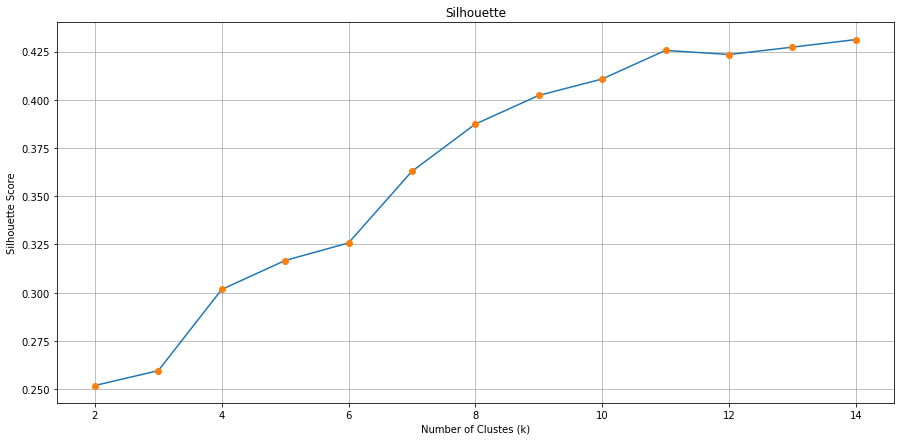

##Max Silhouette Score
0.43122455129483794
k=14


In [17]:
#Silhouette Score
from sklearn.metrics import silhouette_score
x=df_scaled
silhouette_score_value=[]
for coef in range(2,15):
  k_means_algorithm=KMeans(n_clusters=coef,init="k-means++",random_state=11)
  k_means_algorithm.fit(x)
  pred=k_means_algorithm.labels_
  silhouette_score_value.append(silhouette_score(x,pred))

plt.figure(1,figsize=(15,7))
plt.plot(range(2,15),silhouette_score_value)
plt.plot(np.arange(2 , 15) , silhouette_score_value , 'o')
plt.grid(True)
plt.title("Silhouette")
plt.xlabel("Number of Clustes (k)")
plt.ylabel("Silhouette Score")
plt.show()

print("##Max Silhouette Score")
print(max(silhouette_score_value))
print("k=14")

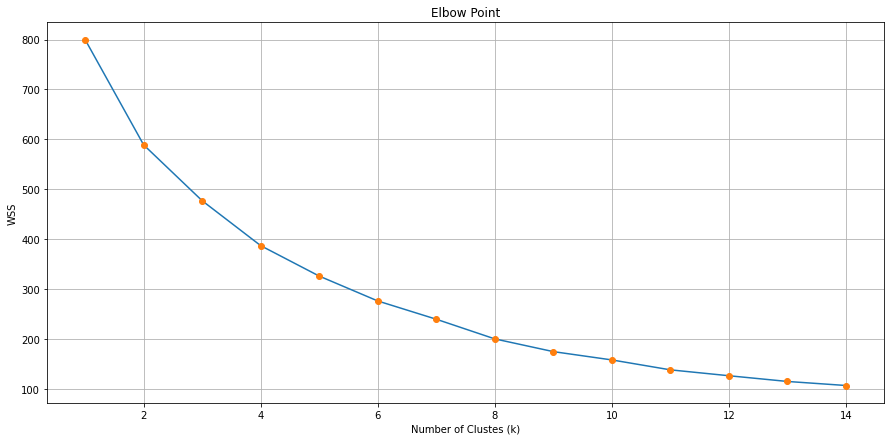

In [18]:
#Elbow point

x=df_scaled
s=[]
for k in range(1,15):
  k_means_algorithm=KMeans(n_clusters=k,init="k-means++",random_state=11)
  k_means_algorithm.fit(x)
  s.append(k_means_algorithm.inertia_)

plt.figure(1,figsize=(15,7))
plt.plot(range(1,15),s)
plt.plot(np.arange(1 , 15) , s , 'o')
plt.grid(True)
plt.title("Elbow Point")
plt.xlabel("Number of Clustes (k)")
plt.ylabel("WSS")
plt.show()

##결과[1]


*   Original Data 
*   n_clusters=6
* k-means++ 사용해 랜덤 초기 설정의 위험 방지


=> 대체로 분류가 잘 이루어짐

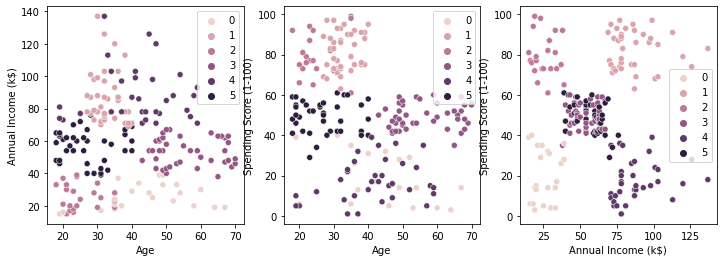

In [19]:
k_means_algorithm=KMeans(n_clusters=6,random_state=11,init="k-means++")
k_means_algorithm.fit(df) 
#clustering 2차원 시각화 -> 잘 분류됨
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df, hue=k_means_algorithm.labels_,ax=axes[0])
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df, hue=k_means_algorithm.labels_,ax=axes[1])
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue=k_means_algorithm.labels_,ax=axes[2])

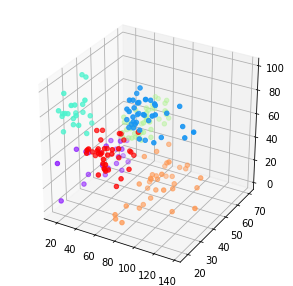

In [20]:
from mpl_toolkits.mplot3d import Axes3D
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']
ax.scatter(x, y, z, c = k_means_algorithm.labels_, s= 20,  cmap='rainbow')

##결과[2]


*   Standard-Scaled Data 
*   n_clusters=8
* k-means++ 사용해 랜덤 초기 설정의 위험 방지


=> 대체로 분류가 잘 이루어짐<br>
*Standard Scaled되지 않은 데이터의 분류 결과가 더 우수*

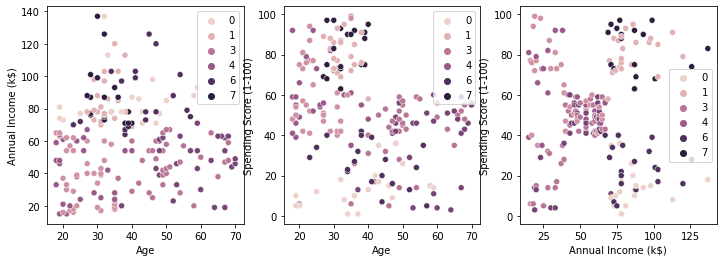

In [21]:
k_means_algorithm=KMeans(n_clusters=8 ,random_state=11,init="k-means++")
k_means_algorithm.fit(df_scaled) 
#clustering 2차원 시각화 -> 상대적으로 덜 분류됨
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df, hue=k_means_algorithm.labels_,ax=axes[0])
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df, hue=k_means_algorithm.labels_,ax=axes[1])
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue=k_means_algorithm.labels_,ax=axes[2])

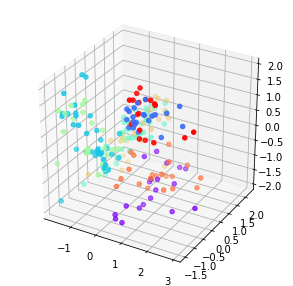

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 
#clustering 3차원 시각화 -> 상대적으로 덜 분류됨
x = df_scaled['Annual Income (k$)']
y = df_scaled['Age']
z = df_scaled['Spending Score (1-100)']
ax.scatter(x, y, z, c = k_means_algorithm.labels_, s= 20,  cmap='rainbow')

##정리



*   Orignal Data
*   n_clusters=6
*   k-means++
일 때 우수한 K-means Clustering 결과를 보임<br><br>근거]<br>1. 3D 입체로 시각화 하였을 때도 군집을 파악하기 더 용이함<br>2. Silhouette Score 값도 1에 더 가까움



#DBSCAN

:분리형/비계층적 군집화 -> 밀도 기반 군집화<br>
`가정`:동일한 군집에 속하는 데이터는 서로 근접하게 분포할 것이다.<br><br>

**metrics로 측정한 eps 내에 데이터가 min_samples개 이상 있으면 하나의 군집**
*   `eps` : `주변 거리` : 한 데이터가 주변의 얼마까지 떨어진 거리를 같은 군집으로 할 것인가
*   `min_samples` : `최소 데이터 수` : 적어도 한 군집에 몇 개의 데이터가 있어야 하는가
*   `metrics` : `거리측정` : default=euclidean
<br>
<br>

`알고리즘`<br>
1. 랜덤으로 데이터 선택
2. 그 데이터 내에서 eps 내 모든 데이터 찾기<br>
  *min_samples보다 작은 경우 어떤 클래스에도 속하지 않음<br>
  *min_samples보다 많은 경우 핵심 포인트로 label하고 새로운 label 할당<br>
3. 핵심포인트의 eps 거리 안의 모든 이웃 데이터 살피기<br>
  *아직 할당되지 않았다면 직전에 만든 클러스터 할당<br>
  *핵심 포인트인 경우 그 이웃을 확인<br>
4. eps내 더이상 핵심 포인트가 없을 때까지 진행

**1.Original Data**
*   가장 고르게 나뉜 경우:<br>========min sample: 8, eps: 11========<br>
cluster 갯수:  5<br>
cluster 별 갯수:  [90 11 46 24 29]<br>

In [23]:
from sklearn.cluster import DBSCAN

#이중 for문을 돌며 min_samples와 eps에 따른 군집 갯수와 각 군집에 몇개의 data가 포함되어 있는지 출력
#=> 적절한 min_samples와 eps값을 구함
for min_sample_value in [2,4,6,7,8,9,10]:
  for eps_value in [8, 11, 15, 18]:
    dbscan_model=DBSCAN(eps=eps_value,min_samples=min_sample_value)
    pred=dbscan_model.fit_predict(df)
    label,counts=np.unique(pred,return_counts=True)
    print("===========min sample: %d, eps: %d==========="%(min_sample_value,eps_value))
    print("cluster 갯수: ",len(label))
    print("cluster 별 갯수: ",counts)
 

===========min sample: 2, eps: 8===========
cluster 갯수:  29
cluster 별 갯수:  [36 13  3  2  2  3  2  2  2 26  8 13 19  7  4  2  3 26  2  2  2  3  3  2
  3  3  3  2  2]
===========min sample: 2, eps: 11===========
cluster 갯수:  16
cluster 별 갯수:  [ 13 101   7   2   8   2  33   3   2  13   4   3   2   3   2   2]
===========min sample: 2, eps: 15===========
cluster 갯수:  4
cluster 별 갯수:  [  3 156  39   2]
===========min sample: 2, eps: 18===========
cluster 갯수:  2
cluster 별 갯수:  [  1 199]
===========min sample: 4, eps: 8===========
cluster 갯수:  10
cluster 별 갯수:  [91  9  6 26 12 19  7  4 23  3]
===========min sample: 4, eps: 11===========
cluster 갯수:  7
cluster 별 갯수:  [41 99  6  6 32  4 12]
===========min sample: 4, eps: 15===========
cluster 갯수:  3
cluster 별 갯수:  [  9 156  35]
===========min sample: 4, eps: 18===========
cluster 갯수:  2
cluster 별 갯수:  [  5 195]
===========min sample: 6, eps: 8===========
cluster 갯수:  8
cluster 별 갯수:  [118   9  21   6  18   6  11  11]
===========min sample: 6, ep

##결과 [1]


*   original data
*   min_samples=8, eps=11
*  군집별 분포 `-1`: 90,  `0`: 11, `1`:46,  `2`:24,  `3`:29}





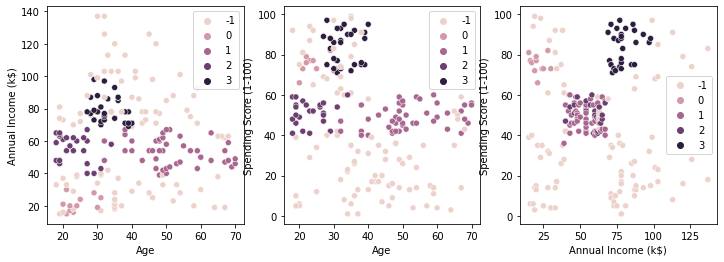

In [24]:
dbscan_model= DBSCAN(eps=11, min_samples=8)
pred= dbscan_model.fit_predict(df)
#clustering 2차원 시각화
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df, hue=dbscan_model.labels_,ax=axes[0])
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df, hue=dbscan_model.labels_,ax=axes[1])
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue=dbscan_model.labels_,ax=axes[2])

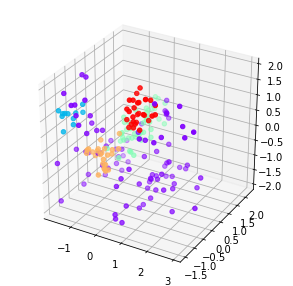

In [25]:
from mpl_toolkits.mplot3d import Axes3D
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df_scaled['Annual Income (k$)']
y = df_scaled['Age']
z = df_scaled['Spending Score (1-100)']
ax.scatter(x, y, z, c = dbscan_model.labels_, s= 20,  cmap='rainbow')


**2.StandardScaled Data**
*   가장 고르게 나뉜 경우<br>===========min sample: 8, eps: 0.700===========<br>
cluster 갯수:  6<br>
cluster 별 갯수:  [76 62 23 10 19 10]

In [26]:
from sklearn.cluster import DBSCAN
#이중 for문을 돌며 min_samples와 eps에 따른 군집 갯수와 각 군집에 몇개의 data가 포함되어 있는지 출력
for min_sample_value in [1,2,3,4,5,6,7,8]:
  for eps_value in [0.7,0.8,0.9,1]:
    dbscan_model=DBSCAN(eps=eps_value,min_samples=min_sample_value)
    pred=dbscan_model.fit_predict(df_scaled)
    label,counts=np.unique(pred,return_counts=True)
    print("===========min sample: %d, eps: %.3f==========="%(min_sample_value,eps_value))
    print("cluster 갯수: ",len(label))
    print("cluster 별 갯수: ",counts)
 

===========min sample: 1, eps: 0.700===========
cluster 갯수:  20
cluster 별 갯수:  [ 1 43  1 94  1  4  2  1  1  1 10 16  3  4  6  6  1  2  2  1]
===========min sample: 1, eps: 0.800===========
cluster 갯수:  13
cluster 별 갯수:  [ 1 77  1 94  1  4  2  1  1 14  1  2  1]
===========min sample: 1, eps: 0.900===========
cluster 갯수:  9
cluster 별 갯수:  [  1  77   1 111   4   2   1   2   1]
===========min sample: 1, eps: 1.000===========
cluster 갯수:  8
cluster 별 갯수:  [  1  77   1 111   4   2   2   2]
===========min sample: 2, eps: 0.700===========
cluster 갯수:  13
cluster 별 갯수:  [ 8 43 94  4  2 10 16  3  4  6  6  2  2]
===========min sample: 2, eps: 0.800===========
cluster 갯수:  7
cluster 별 갯수:  [ 7 77 94  4  2 14  2]
===========min sample: 2, eps: 0.900===========
cluster 갯수:  6
cluster 별 갯수:  [  4  77 111   4   2   2]
===========min sample: 2, eps: 1.000===========
cluster 갯수:  7
cluster 별 갯수:  [  2  77 111   4   2   2   2]
===========min sample: 3, eps: 0.700===========
cluster 갯수:  10
cluster 별 갯수: 

##결과 [2]


*   StandardScaled Data
*   min_samples=8, eps=0.7
*  군집별 분포 {`-1`: 76,  `0`: 62, `1`:23,  `2`:10,  `3`:19, `4`:10}

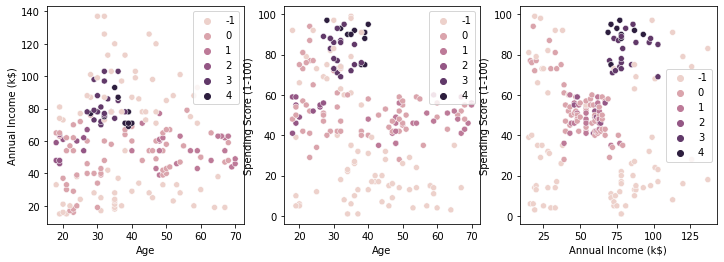

In [27]:
dbscan_model= DBSCAN(eps=0.7, min_samples=8)
pred= dbscan_model.fit_predict(df_scaled)
#clustering 2차원 시각화 
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df, hue=dbscan_model.labels_,ax=axes[0])
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df, hue=dbscan_model.labels_,ax=axes[1])
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue=dbscan_model.labels_,ax=axes[2],)

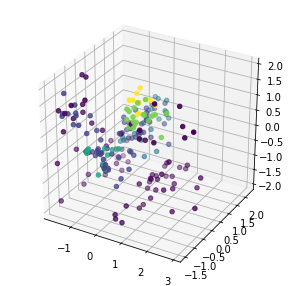

In [28]:
from mpl_toolkits.mplot3d import Axes3D
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df_scaled['Annual Income (k$)']
y = df_scaled['Age']
z = df_scaled['Spending Score (1-100)']
ax.scatter(x, y, z, c = dbscan_model.labels_, s= 20)

##정리
두 경우 모두 성능이 우수하지 않음

근거]<br>
*   모든 데이터가 대체로 고르게 분포하여 밀집도로 구분하기 어렵기 때문

#Agglomerative Hierarchical Clustering

계층적 군집화 -> 병합형<br><br>
`알고리즘`
1. 하나의 데이터를 하나의 군집으로 지정
2. 1.에서의 군집들에 대해  *유사도가 높은 군집*  둘을 하나로 합침
3. 2.에서 생성된 군집들에 대해 다음 과정 반복
<br>

`유사도가 높은 군집`<br>
* `Single linkage` : 두 군집에 속하는 데이터의 거리 중 가장 짧은 거리를 군집 사이의 거리로 설정<br>
* `Complete linkage` : 두 군집에 속하는 데이터의 거리 중 가장 먼 거리를 군집 사이의 거리로 설정<br>
* `Average linkage` :  두 군집에 속하는 데이터의 거리 '평균'을 군집 사이의 거리로 간주<br>
* `Ward linkage` : 군집 내 편차제곱에 기반한 방법, 비숫한 크기의 군집끼리 묶어주는 경향

In [29]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram



**1.original data**<br>

*   ward에서 우수한 성능 보임 -> 노이즈에 비교적 덜 예민

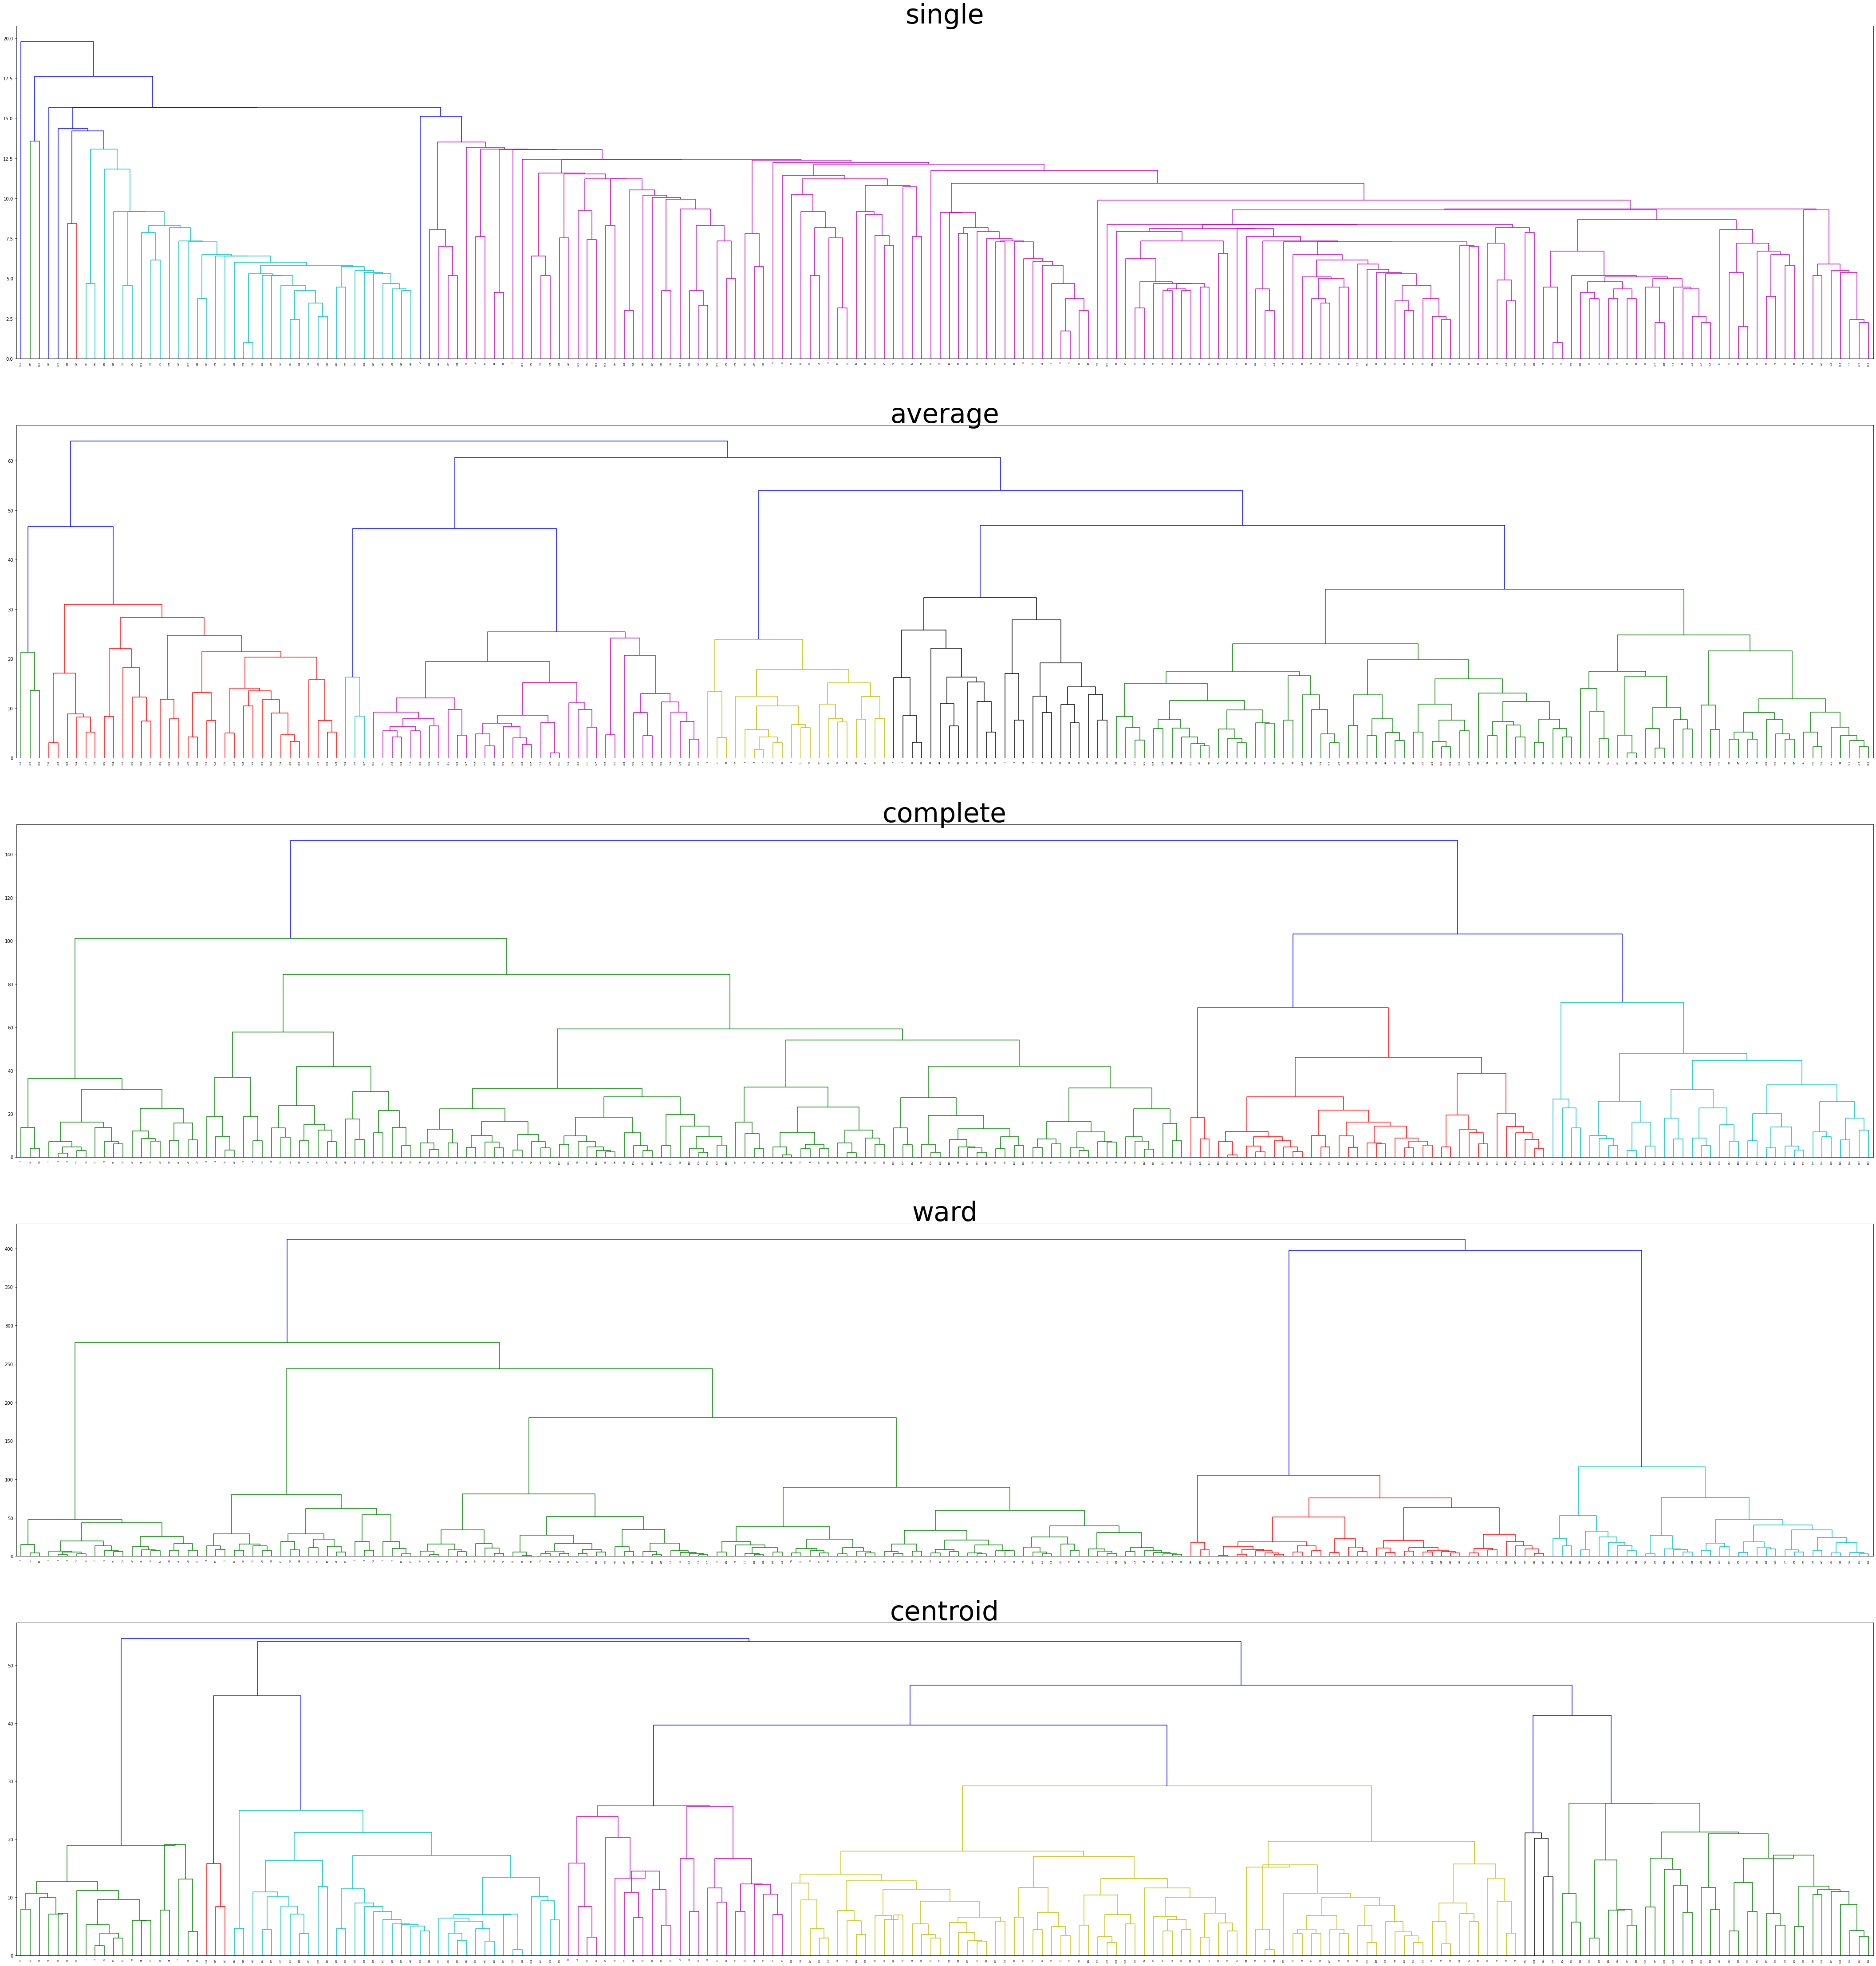

In [30]:
cal_distance=['single','average','complete','ward','centroid']
fig, axes = plt.subplots(nrows=len(cal_distance), figsize=(75,80))
i=0
#for을 돌며 method별로 유사도가 높은 두 군집이 합쳐지는 과정을 시각화
for method_value in cal_distance:
  hierarchical_model=linkage(df,method=method_value)
  dendrogram(hierarchical_model,ax=axes[i])
  axes[i].set_title(method_value,fontsize=60)
  i+=1





**2.Standard-Scaled data**<br>



*   ward에서 우수한 성능 보임 -> 노이즈에 비교적 덜 예민

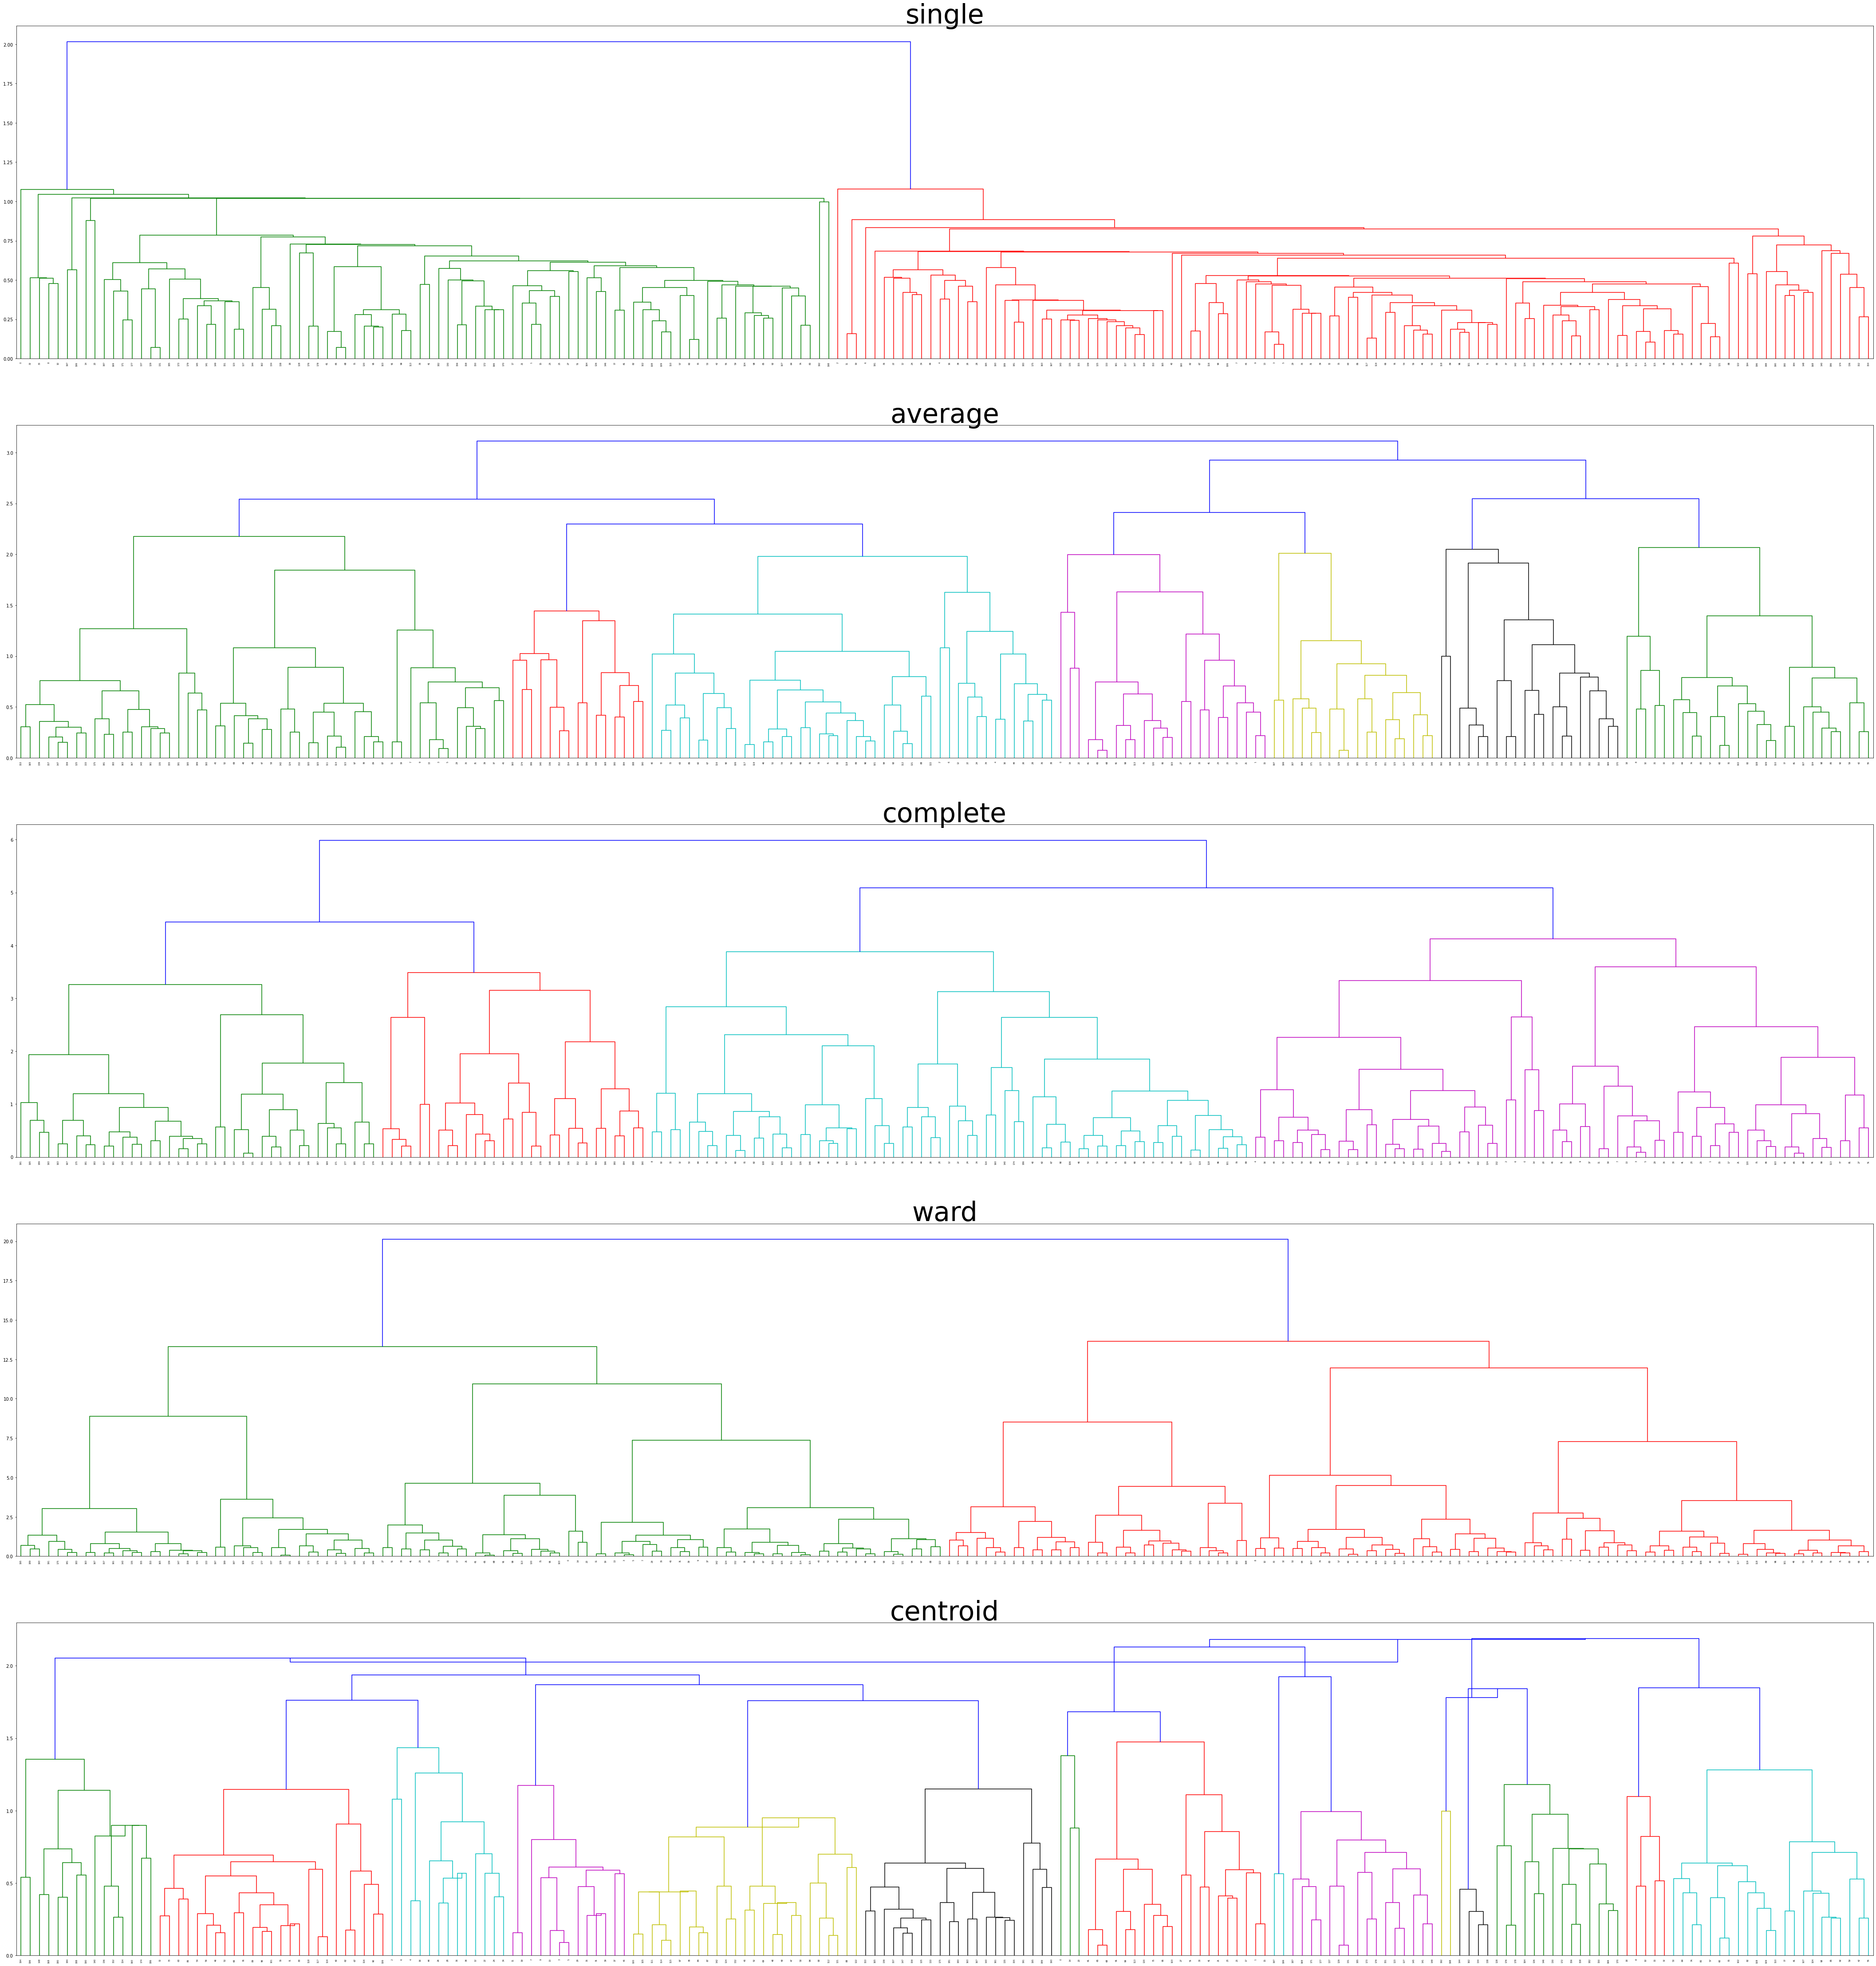

In [31]:
cal_distance=['single','average','complete','ward','centroid']
fig, axes = plt.subplots(nrows=len(cal_distance), figsize=(75,80))
i=0
#for을 돌며 method별로 유사도가 높은 두 군집이 합쳐지는 과정을 시각화
for method_value in cal_distance:
  hierarchical_model=linkage(df_scaled,method=method_value)
  dendrogram(hierarchical_model,ax=axes[i])
  axes[i].set_title(method_value,fontsize=60)
  i+=1

##결과[1]
* original data
* method=ward<br>
*  n_clusters=5 <br>
이유: 군집이 6개가 되는 순간부터는 군집 간의 거리가 급격하게 줄어듬




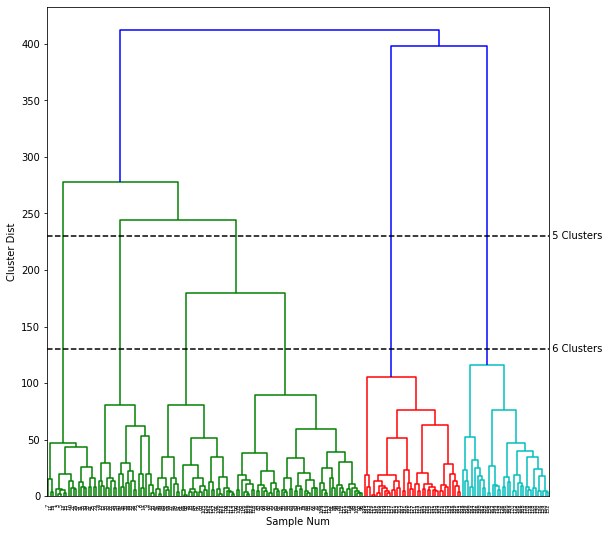

In [32]:

dendrogram(linkage(df,method="ward"))
plt.xlabel("Sample Num")
plt.ylabel("Cluster Dist")
ax = plt.gca()
cut = ax.get_xbound()
ax.plot(cut, [230, 230], '--', c='k') #5 cluster인 경우 군집 간의 거리 대략 230
ax.text(cut[1], 230, ' 5 Clusters ', va='center', fontdict={'size': 10})
ax.plot(cut, [130, 130], '--', c='k') #6 cluster인 경우 군집 간의 거리 대략 130
ax.text(cut[1], 130, ' 6 Clusters ', va='center', fontdict={'size': 10})
plt.show()

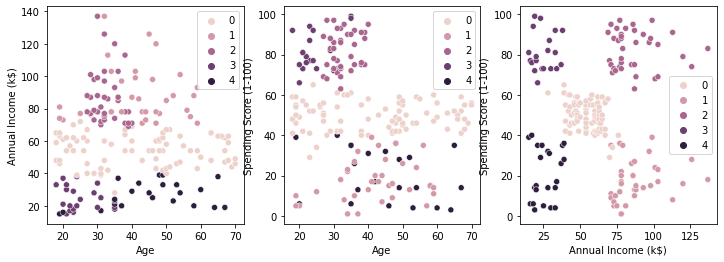

In [33]:
from sklearn.cluster import AgglomerativeClustering
agglomerat_model = AgglomerativeClustering(n_clusters=5, linkage='ward') 
pred= agglomerat_model.fit_predict(df)

#clustering 2차원 시각화 
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df, hue=agglomerat_model.labels_,ax=axes[0])
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df, hue=agglomerat_model.labels_,ax=axes[1])
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue=agglomerat_model.labels_,ax=axes[2])

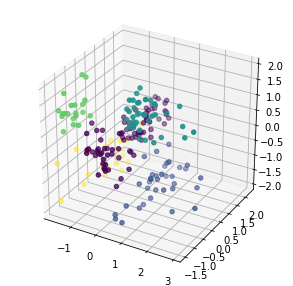

In [34]:
from mpl_toolkits.mplot3d import Axes3D
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df_scaled['Annual Income (k$)']
y = df_scaled['Age']
z = df_scaled['Spending Score (1-100)']
ax.scatter(x, y, z, c = agglomerat_model.labels_, s= 20)

##결과[2]
* Standard-Scaled data
*method=ward
*  n_clusters=5 <br>
이유: 군집이 6개가 되는 순간부터는 군집 간의 거리가 급격하게 줄어듬

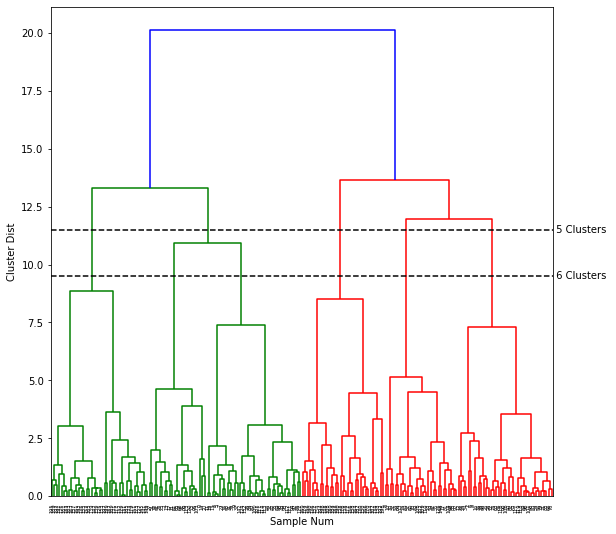

In [35]:

dendrogram(linkage(df_scaled,method="ward"))
plt.xlabel("Sample Num")
plt.ylabel("Cluster Dist")
ax = plt.gca()
cut = ax.get_xbound()
ax.plot(cut, [11.5, 11.5], '--', c='k') #5 cluster인 경우 군집 간의 거리 대략 11.5
ax.text(cut[1], 11.5, ' 5 Clusters ', va='center', fontdict={'size': 10})
ax.plot(cut, [9.5, 9.5], '--', c='k') #6 cluster인 경우 군집 간의 거리 대략 9.5
ax.text(cut[1], 9.5, ' 6 Clusters ', va='center', fontdict={'size': 10})
plt.show()

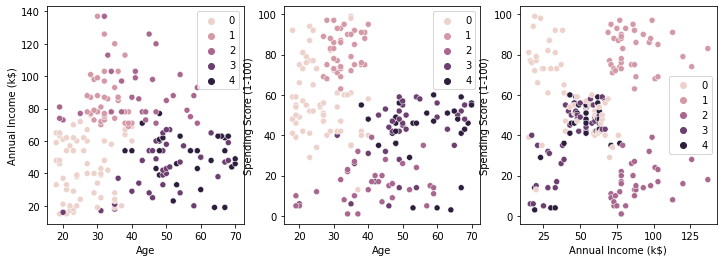

In [36]:
from sklearn.cluster import AgglomerativeClustering
agglomerat_model = AgglomerativeClustering(n_clusters=5, linkage='ward') 
pred= agglomerat_model.fit_predict(df_scaled)

#clustering 2차원 시각화 
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df, hue=agglomerat_model.labels_,ax=axes[0])
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df, hue=agglomerat_model.labels_,ax=axes[1])
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue=agglomerat_model.labels_,ax=axes[2])

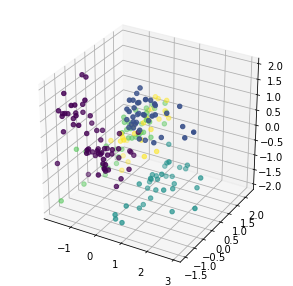

In [37]:
from mpl_toolkits.mplot3d import Axes3D
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df_scaled['Annual Income (k$)']
y = df_scaled['Age']
z = df_scaled['Spending Score (1-100)']
ax.scatter(x, y, z, c = agglomerat_model.labels_, s= 20)

##정리


*   Original Data
*  ward
*   n_clusters=5
일 때 성능 우수함

#Mean Shift Clustering
각 점들에 대해 데이터의 분포에서 mode를 찾아 이동하며 점들이 적당하게 모일 것

`장점`
K-Means와 달리 군집의 갯수를 직접 지정할 필요가 없음. Mean Shift가 자동적으로 발견<br>
`단점`
bandwidth나 kernel의 사이즈를 직접 지정해 줘야함

##결과[1]
* original data
*  n_samples=15 <br>
이유: n_samples= 20의 경우 군집의 나눠짐이 모호짐 & Silhouette Score의 큰 변화 없음

In [38]:
from sklearn.cluster import MeanShift, estimate_bandwidth

#n_samples= 15
#bandwidth로 얼마나 관대하게 봐줄 것인지 설정
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=15)
 
#MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df)

#군집의 갯수 출력
labels = ms.labels_ 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Clusters found: %d" % n_clusters_)

Clusters found: 5


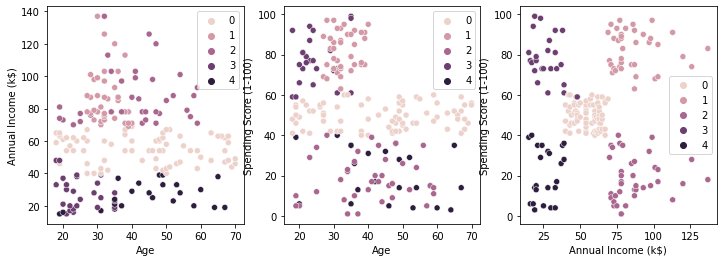

In [39]:
#clustering 2차원 시각화 
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df, hue=labels,ax=axes[0])
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df, hue=labels,ax=axes[1])
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue=labels,ax=axes[2])

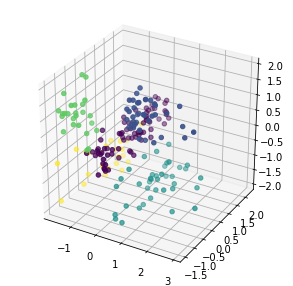

In [40]:
from mpl_toolkits.mplot3d import Axes3D
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df_scaled['Annual Income (k$)']
y = df_scaled['Age']
z = df_scaled['Spending Score (1-100)']
ax.scatter(x, y, z, c = ms.labels_, s= 20)

##결과[1]
* Standard Scaled data
*  n_samples=15 <br>
이유: n_samples= 20의 경우 군집의 나눠짐이 모호짐 & Silhouette Score의 큰 변화 없음

In [41]:
from sklearn.cluster import MeanShift, estimate_bandwidth

#n_samples= 15
#bandwidth로 얼마나 관대하게 봐줄 것인지 설정
bandwidth = estimate_bandwidth(df_scaled, quantile=0.2, n_samples=15)
 
#MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(df_scaled)
labels = ms.labels_

#군집의 갯수 출력 
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Clusters found: %d" % n_clusters_)

Clusters found: 6


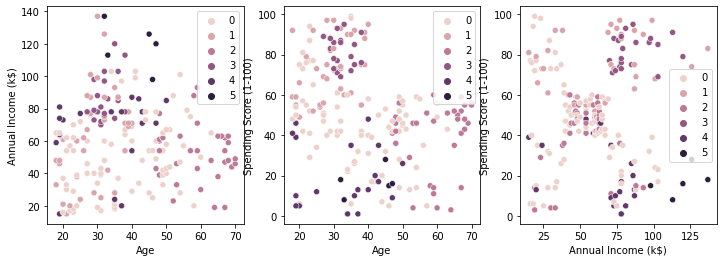

In [42]:

#clustering 2차원 시각화 
fig, axes = plt.subplots(ncols=3, figsize=(12,4))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df, hue=labels,ax=axes[0])
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df, hue=labels,ax=axes[1])
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue=labels,ax=axes[2])

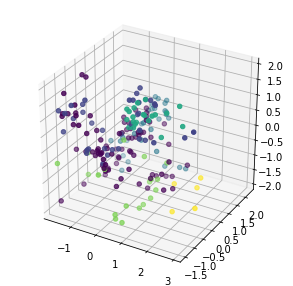

In [43]:
from mpl_toolkits.mplot3d import Axes3D
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df_scaled['Annual Income (k$)']
y = df_scaled['Age']
z = df_scaled['Spending Score (1-100)']
ax.scatter(x, y, z, c = ms.labels_, s= 20)

##정리


*  original data
*  n_samples=15
*   clusters : 4 일 때 우수함





#평가



1. Silhouette Score<br> *군집 안의 데이터가 해당 군집 안의 다른 데이터와 얼마나 유사하며, 다른 군집에 속한 데이터와 얼마나 차이가 나는지 측정 <br> * -1~1사이의 값을 가지며 1에 가까울 수록 적절한 군집화가 되었다고 판단



*   kMeans Clustering이 실루엣 계수에 근거해 가장 우수하게 군집을 형성함<br>
* DBSCAN은 가장 저조한 실루엣 계수를 가지며 군집을 형성하는데 적합한 방법이 아님



In [44]:
kmeans = KMeans(n_clusters=6, init="k-means++")
print('KMeans:', silhouette_score(df, kmeans.fit_predict(df)))
dbscan = DBSCAN(eps=11, min_samples=8)
print('DBSCAN:', silhouette_score(df, dbscan.fit_predict(df)))
agglomerativeclustering = AgglomerativeClustering(n_clusters=6, linkage='ward') 
print('agglomerativeclustering:', silhouette_score(df, agglomerativeclustering.fit_predict(df)))
meanshift=MeanShift(estimate_bandwidth(df,quantile=0.2,n_samples=15),bin_seeding=True)
print('MeanShift:', silhouette_score(df, meanshift.fit_predict(df)))

KMeans: 0.45205475380756527
DBSCAN: 0.14733884081530665
agglomerativeclustering: 0.4428008535928764
MeanShift: 0.43883668698977824


2. 3D plot에 clustering한 결과 시각화

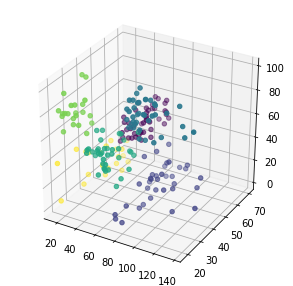

In [45]:
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']
ax.scatter(x, y, z, c = kmeans.labels_, s= 20)

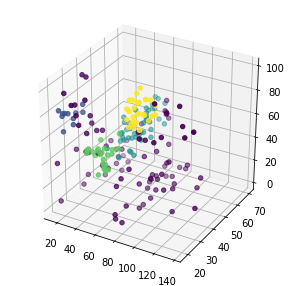

In [46]:
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']
ax.scatter(x, y, z, c = dbscan.labels_, s= 20)

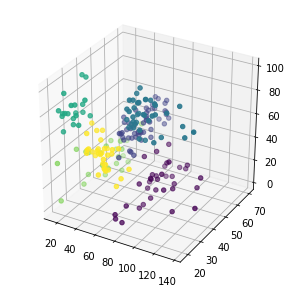

In [47]:
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']
ax.scatter(x, y, z, c = agglomerativeclustering.labels_, s= 20)

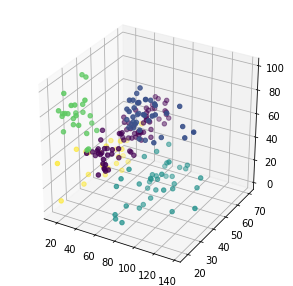

In [48]:
#clustering 3차원 시각화
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d') 

x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']
ax.scatter(x, y, z, c = meanshift.labels_, s= 20)